# Case Study- Lead Scoring
<i><b>Sawan Shivanand Beli</b></i><br></br>
<i><b>Smarth Hans</b></i>

## Problem Statement

This Case Study is a programming assignment wherein you have to find out variables that would help the Company get more people to pursue their course.

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
<img src="Cs.jpg">
### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; Lead Conversion Process - Demonstrated as a funnel

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing libraries

In [1]:
## loading libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np, pandas as pd
import calendar
sns.set(style="darkgrid")
from scipy.stats import stats
pd.set_option('display.max_columns',100)

## Reading and understanding data

In [2]:
# creating data frame lead_df
lead_df = lead_df = pd.read_csv(r'Leads.csv')

In [3]:
# checking df
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking shape
lead_df.shape

(9240, 37)

In [5]:
# checking statistical summary of numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking for duplicate entries
sum(lead_df.duplicated(subset = 'Prospect ID')) == 1

False

In [8]:
sum(lead_df.duplicated(subset = 'Lead Number')) == 1

False

### Inferences 
- No duplicates 

## Data cleaning & EDA

In [9]:
# Since Prospect Id and Lead Number are just unique Id numbers given to each contacted customer. Drop these columns
lead_df.drop(['Lead Number'], 1, inplace = True)

In [10]:
# checking null values 
100*lead_df.isnull().mean()

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [11]:
# looking for Occurrence of string "Select" in df
# as these values are random and can be considered as missing at random
# checking col names 
cols =list(lead_df.columns)
for i in cols:
    print(i)
    print(lead_df[[i]][lead_df[i]=='Select'].shape[0])

Prospect ID
0
Lead Origin
0
Lead Source
0
Do Not Email
0
Do Not Call
0
Converted
0
TotalVisits
0
Total Time Spent on Website
0
Page Views Per Visit
0
Last Activity
0
Country
0
Specialization
1942
How did you hear about X Education
5043
What is your current occupation
0
What matters most to you in choosing a course
0
Search
0
Magazine
0
Newspaper Article
0
X Education Forums
0
Newspaper
0
Digital Advertisement
0
Through Recommendations
0
Receive More Updates About Our Courses
0
Tags
0
Lead Quality
0
Update me on Supply Chain Content
0
Get updates on DM Content
0
Lead Profile
4146
City
2249
Asymmetrique Activity Index
0
Asymmetrique Profile Index
0
Asymmetrique Activity Score
0
Asymmetrique Profile Score
0
I agree to pay the amount through cheque
0
A free copy of Mastering The Interview
0
Last Notable Activity
0


### Inferences
- As we know that occurance of string 'Select' in various columns has no particular significance
- These values in certain columns are shown as "Select" as a result of not choosing an option from the list
- Hence we convert this value(select) to Nan as it is as good or same as NULL

In [15]:
# checking 
(lead_df[lead_df.values == 'Select']).shape

(13380, 36)

In [13]:
# replacing 'Select' with nan values 
lead_df=lead_df.replace("Select",np.nan)

In [14]:
# Verifying occurrence of string ‘Select’
(lead_df[lead_df.values == 'Select']).shape

(0, 36)

In [15]:
# check top top 5 rows of df
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Treatment of missing values with inferences 

In [16]:
# checking percentage of null values 
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# dropping cols having null values greater than 40%
# creating new df lead_df1
lead_df1 = lead_df.loc[:,lead_df.isnull().mean() < .4]
lead_df1.shape

(9240, 29)

In [18]:
# checking percentage of null values 
round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
# # Now we analyse each column's values individually and do the needful. we go from highest to the least.
# # first the lead quality as it has ~51% of missing values.
# lead_df1['Lead Quality'].describe()

In [20]:
# # checking percentage of missing values 
# lead_df1['Lead Quality'].value_counts(dropna = False, normalize =True)

In [21]:
# # Countplot for lead quality
# plt.title("Lead Quality",fontweight='bold', fontsize=8)

# sns.countplot(lead_df1['Lead Quality'])
# plt.show()

In [22]:
# # Since lead Quality has ~51% missing values we can impute these with not sure
# lead_df1['Lead Quality'] = lead_df1['Lead Quality'].replace(np.nan, 'Not Sure')

In [23]:
# lead_df1['Lead Quality'].value_counts(dropna = False, normalize =True)

### Checking skewness 

In [24]:
# checking value counts to check skewness
cols1 = lead_df1.columns
for i in cols1:
    print(i + "-------")
    print(lead_df1[i].value_counts(normalize=True))
    print('\n')

Prospect ID-------
e0e44e2a-b0ea-4a79-87b7-976ab8bb425b    0.000108
4ef9ed60-1bb1-4eda-bab5-725643130faa    0.000108
8b32f768-1c57-4fc0-a854-b47f62c0a6bc    0.000108
2a9dae43-c851-435b-8072-a212d5e27123    0.000108
12bb6573-b71e-4cf4-8443-8c6cf74e3ebd    0.000108
                                          ...   
f6e528f6-fc62-4f31-a398-03c0c879f2fd    0.000108
834e66d6-a45b-4b27-90e5-9482f30a2122    0.000108
7b236672-7df5-4145-b4ab-67cad9ec0453    0.000108
7fda7d26-d0f4-43ec-9c85-fb81e25019ac    0.000108
c762ad02-f727-4dcd-b474-84e26a619211    0.000108
Name: Prospect ID, Length: 9240, dtype: float64


Lead Origin-------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Lead Source-------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference         

In [25]:
# checking skewness 
lead_df1.Country.value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Canada                  0.000590
Germany                 0.000590
Kuwait                  0.000590
South Africa            0.000590
Nigeria                 0.000590
Sweden                  0.000443
China                   0.000295
Bangladesh              0.000295
Uganda                  0.000295
Italy                   0.000295
Netherlands             0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
Belgium                 0.000295
Ghana                   0.000295
Vietnam                 0.000148
Russia                  0.000148
Malaysia  

### Inferences 
- As country is highly skewed as 95% of values belong to india lets drop the column 

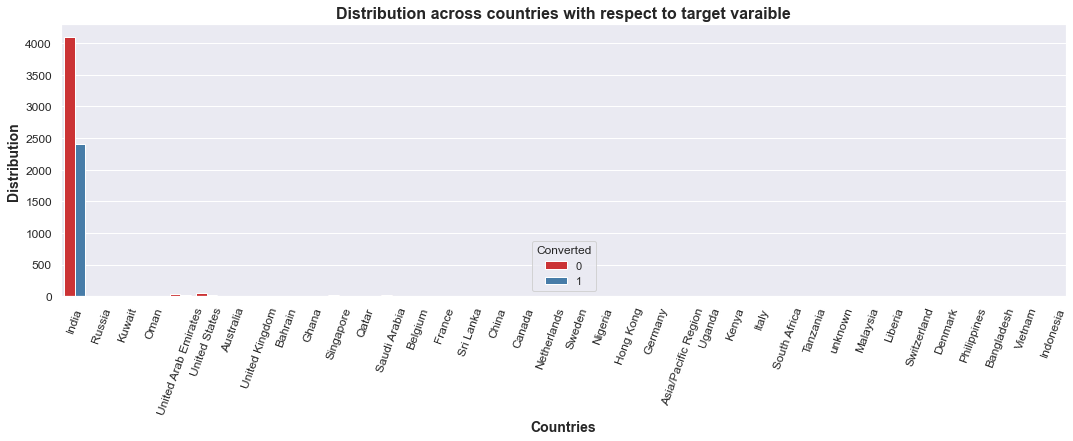

In [26]:
# checking skewness of country attribute

plt.figure(figsize=[18,5])
Count_plt=sns.countplot(lead_df1.Country, hue=lead_df1.Converted,orient='h',palette="Set1")
Count_plt.set_xticklabels(Count_plt.get_xticklabels(),rotation=70,fontsize=12)
plt.title("Distribution across countries with respect to target varaible",fontweight='bold', fontsize=16)
plt.yticks(fontsize = 12)
plt.xlabel("Countries", fontsize = 14, fontweight ='bold' )
plt.ylabel("Distribution", fontsize = 14, fontweight ='bold' )

plt.show()

In [27]:
#now lets analyse the country variable
round(100*(lead_df1.Country.value_counts(dropna=False)/len(lead_df1.index)), 2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Kuwait                   0.04
Germany                  0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Sweden                   0.03
Philippines              0.02
Italy                    0.02
Ghana                    0.02
China                    0.02
Bangladesh               0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Belgium                  0.02
Netherlands              0.02
Denmark                  0.01
Switzerland              0.01
Indonesia                0.01
Liberia                  0.01
Tanzania  

In [28]:
## Dropping country as it is highly skewed 
lead_df1.drop('Country', axis=1, inplace = True)

In [29]:
#WHat matters most to you in choosing a course
lead_df1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
#replacing Nan values
lead_df1['What matters most to you in choosing a course'] = lead_df1['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

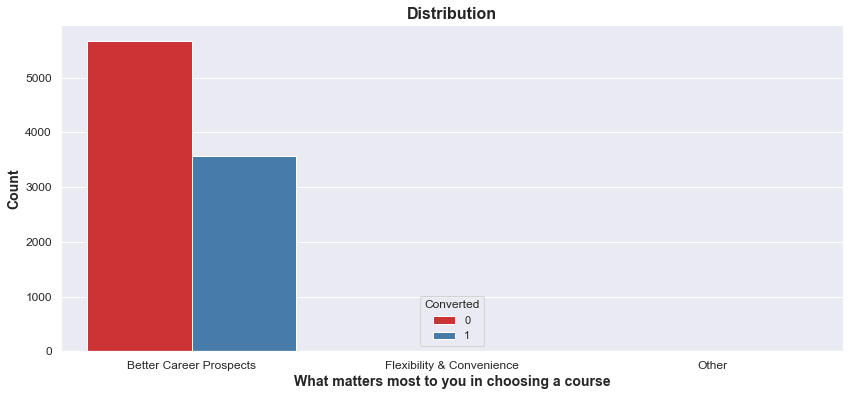

In [31]:
plt.figure(figsize=(14,6))
Course_plt=sns.countplot(lead_df1['What matters most to you in choosing a course'], hue=lead_df1.Converted,orient='h',palette='Set1')
plt.title("Distribution",fontweight='bold', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("What matters most to you in choosing a course", fontsize = 14, fontweight ='bold' )
plt.show()

In [32]:
round(100*(lead_df1['What matters most to you in choosing a course'].value_counts(dropna=False)/len(lead_df1.index)), 2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

#### Inferences 
- Since Better Career Prospects make almost the entire column. We can simply drop it

In [33]:
# checking
lead_df1.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


In [34]:
lead_df1.drop(['Do Not Call', 'Do Not Email','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque','Update me on Supply Chain Content'], axis=1,inplace=True)

#### Inferences
- Dropping highly skewed attributes whose above 85% atleast

In [35]:
lead_df1.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [36]:
# checking shape
lead_df1.shape

(9240, 14)

In [37]:
# checking null values for imputation or dropping 
100*lead_df1.isnull().mean()

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [38]:
# chhecking data balance 
lead_df1['Converted'].value_counts(normalize = True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [39]:
# checking number of rows in lead rows having missing values 
lead_df1['Lead Source'].isnull().sum()

36

In [40]:
# checking value counts including nan values 
lead_df1['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [41]:
# dropping rows with missing values less than 1 percent as they wont affect the data much only 36 rows
lead_df1=lead_df1[~lead_df1['Lead Source'].isnull()]

In [42]:
# Verifying  
lead_df1['Lead Source'].isnull().sum()

0

In [43]:
#replacing Nan Values and combining low count values into one varibale "Others"
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(np.nan,'Others')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace('google','Google')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace('Facebook','Social Media')
lead_df1['Lead Source'] = lead_df1['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel',
                                               'welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                               'testone','NC_EDM'] ,'Others')                                                   

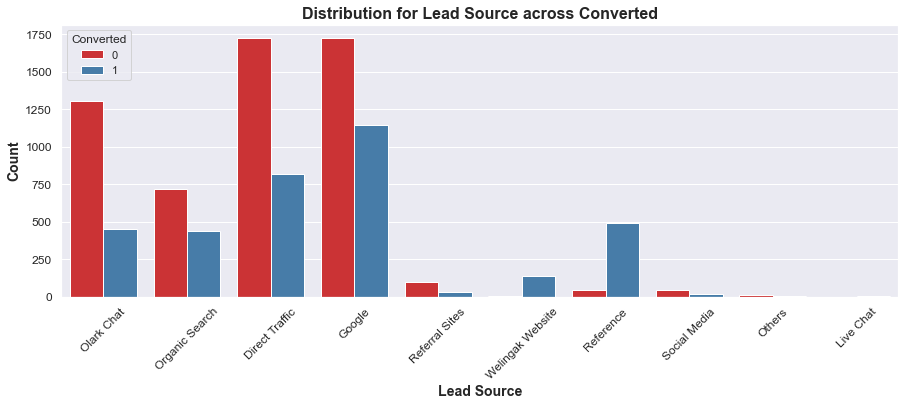

In [44]:
# Checking countplot
plt.figure(figsize=(15,5))
ls_plt=sns.countplot(lead_df1['Lead Source'], hue=lead_df1.Converted,orient='h',palette='Set1')

plt.title("Distribution for Lead Source across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Lead Source", fontsize = 14, fontweight ='bold' )

plt.show()

In [45]:
# checking does dropping rows affect significantly to target varaible
lead_df1['Converted'].value_counts(normalize = True)

0    0.616254
1    0.383746
Name: Converted, dtype: float64

#### Inferences 
- As lead source has very limited values we could either impute them with mode or drop them as they are very less so we opted to drop them
- Also are target variables isn't much affected by dropping the rows
- Google and Direct Traffic generate Maximum number of leads.
- Lead through Welingak Website and Reference leads  have high conversion rate.
- Start concentrating more on improving lead converion of Olark Chat, Organic Search, Direct Traffic and Google leads to improve overall lead conversion rate 
- Generate more leads from reference and Welingak Website.,

In [46]:
# checking missing values again 
100*lead_df1.isnull().mean()

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                1.412429
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.412429
Last Activity                              1.097349
Specialization                            36.418948
What is your current occupation           29.226423
Tags                                      36.310300
City                                      39.526293
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [47]:
# checking shape
lead_df1.shape

(9204, 14)

In [48]:
# checking percentage of nan values 
lead_df1['TotalVisits'].value_counts(normalize=True,dropna= False)

0.0      0.234789
2.0      0.182421
3.0      0.141895
4.0      0.121686
5.0      0.085072
6.0      0.050630
1.0      0.042916
7.0      0.033572
8.0      0.024337
9.0      0.017818
NaN      0.014124
10.0     0.012386
11.0     0.009344
13.0     0.005215
12.0     0.004889
14.0     0.003911
16.0     0.002282
15.0     0.001956
17.0     0.001738
18.0     0.001630
20.0     0.001304
19.0     0.000978
21.0     0.000652
23.0     0.000652
27.0     0.000543
25.0     0.000543
24.0     0.000543
22.0     0.000326
26.0     0.000217
29.0     0.000217
28.0     0.000217
115.0    0.000109
54.0     0.000109
43.0     0.000109
30.0     0.000109
32.0     0.000109
74.0     0.000109
251.0    0.000109
41.0     0.000109
141.0    0.000109
42.0     0.000109
55.0     0.000109
Name: TotalVisits, dtype: float64

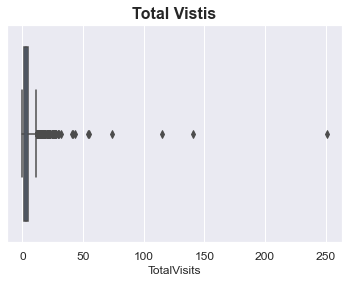

In [49]:
# checking boxplots
sns.boxplot(lead_df1['TotalVisits'])
plt.title("Total Vistis",fontweight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
plt.show()

In [50]:
# checking median
lead_df1['TotalVisits'].median()

3.0

In [51]:
# checking mean
lead_df1['TotalVisits'].mean()

3.456028212475204

In [52]:
# imputing null value with median as it is a countinous varaible with high range so median is most suitable 
lead_df1['TotalVisits'] = lead_df1['TotalVisits'].fillna(lead_df1['TotalVisits'].median())

In [53]:
# Rechecking
lead_df1['TotalVisits'].isnull().sum()

0

#### Inferences
- Imputing null value with median as it is a countinous varaible with high range so median is most suitable 
- Although both mean and median have similar values in total visits column

In [54]:
# checking missing values again 
100*lead_df1.isnull().mean()

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.412429
Last Activity                              1.097349
Specialization                            36.418948
What is your current occupation           29.226423
Tags                                      36.310300
City                                      39.526293
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [55]:
# checking percentage of nan values 
100*lead_df1['Page Views Per Visit'].isnull().mean()


1.4124293785310735

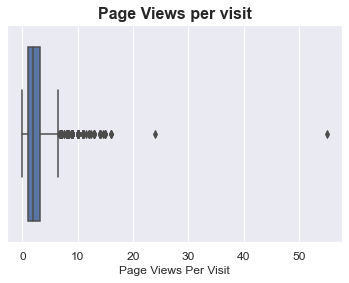

In [56]:
# boxplot for Page Views Per Visit
sns.boxplot(lead_df1['Page Views Per Visit'])
plt.title("Page Views per visit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)


plt.show()

In [57]:
# Checking mean for Page Views Per Visit
(lead_df1['Page Views Per Visit']).mean()

2.370150980824333

In [58]:
# checking median for'Page Views Per Visit
lead_df1['Page Views Per Visit'].median()

2.0

In [59]:
# imputing with mean
lead_df1['Page Views Per Visit'] = lead_df1['Page Views Per Visit'].fillna(lead_df1['Page Views Per Visit'].mean())

In [60]:
# Rechecking null values 
lead_df1['Page Views Per Visit'].isnull().sum()

0

#### Inferences
- Both mean and median are almost similar so imputing with any values is reasonable  as it is a continuous data
- Imputing with mean

In [61]:
# checking null values for Last Activity
lead_df1['Last Activity'].isnull().sum()

101

In [62]:
#replacing Nan Values and combining low count values into one varibale "Others"
lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(np.nan,'Others')


lead_df1['Last Activity'] = lead_df1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                    'View in browser link Clicked','Approached upfront',
                                                    'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                    'Resubscribed to emails'],'Others')

In [63]:
lead_df1['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2723
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 321
Others                        304
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### Inferences
- As percentage of missing values is very less in last activity we can drop or impute with "Others" 


In [64]:
# checking column Specialization for missing values
lead_df1['Specialization'].isnull().sum()

3352

In [65]:
# checking value counts percentage of values in columns
100*lead_df1['Specialization'].value_counts(normalize= True, dropna = False)

NaN                                  36.418948
Finance Management                   10.571491
Human Resource Management             9.202521
Marketing Management                  9.093872
Operations Management                 5.454150
Business Administration               4.378531
IT Projects Management                3.976532
Supply Chain Management               3.791830
Banking, Investment And Insurance     3.672316
Travel and Tourism                    2.205563
Media and Advertising                 2.205563
International Business                1.933942
Healthcare Management                 1.716645
Hospitality Management                1.238592
E-COMMERCE                            1.205997
Retail Management                     1.086484
Rural and Agribusiness                0.793133
E-Business                            0.619296
Services Excellence                   0.434594
Name: Specialization, dtype: float64

In [66]:
lead_df1['Specialization'] = lead_df1['Specialization'].fillna('Unspecified')

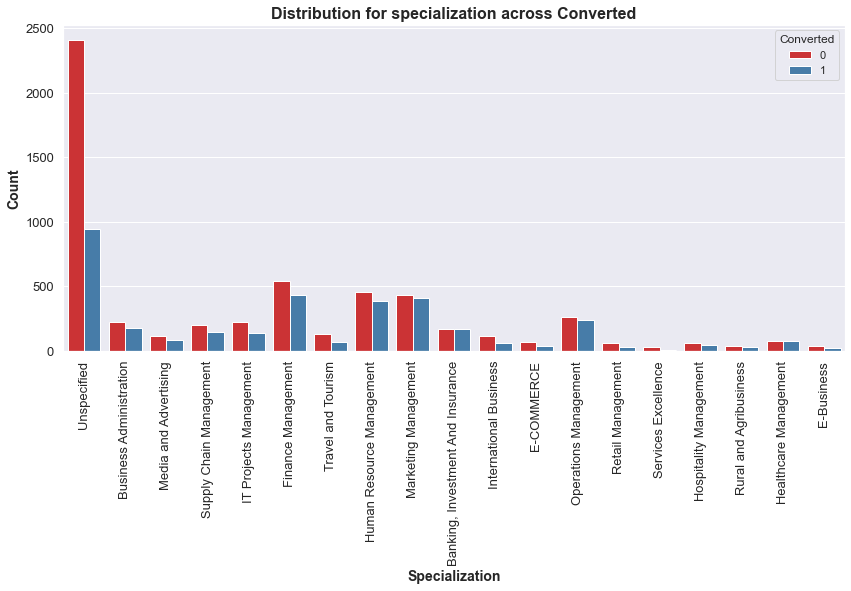

In [67]:
plt.figure(figsize=(14,6))
spcl=sns.countplot(lead_df1.Specialization, hue=lead_df1.Converted,orient='h',palette="Set1")
plt.title("Distribution for specialization across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Specialization", fontsize = 14, fontweight ='bold' )
plt.show()

In [68]:
# Rechecking
lead_df1['Specialization'].isnull().sum()

0

In [69]:
lead_df1['Specialization'].value_counts(dropna = False, normalize = True)

Unspecified                          0.364189
Finance Management                   0.105715
Human Resource Management            0.092025
Marketing Management                 0.090939
Operations Management                0.054542
Business Administration              0.043785
IT Projects Management               0.039765
Supply Chain Management              0.037918
Banking, Investment And Insurance    0.036723
Media and Advertising                0.022056
Travel and Tourism                   0.022056
International Business               0.019339
Healthcare Management                0.017166
Hospitality Management               0.012386
E-COMMERCE                           0.012060
Retail Management                    0.010865
Rural and Agribusiness               0.007931
E-Business                           0.006193
Services Excellence                  0.004346
Name: Specialization, dtype: float64

#### Inferences 
- Imputing the missing values in specialization column with "Others" as it is a categorical column ideally it should be imputed with mode but in given case it won’t be most suitable as missing values are dominating so imputing the values by creating a new category "Others"


In [70]:
# checking missing values again 
100*lead_df1.isnull().mean()

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                             0.000000
What is your current occupation           29.226423
Tags                                      36.310300
City                                      39.526293
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [71]:
# percentage of values in current occupation
100*lead_df1['What is your current occupation'].value_counts(dropna = False, normalize = True)

Unemployed              60.484572
NaN                     29.226423
Working Professional     7.648848
Student                  2.270752
Other                    0.173837
Housewife                0.108648
Businessman              0.086919
Name: What is your current occupation, dtype: float64

In [72]:
# checking number of missing values in column
lead_df1['What is your current occupation'].isnull().sum()

2690

In [73]:
# checking mode 
lead_df1['What is your current occupation'].mode()[0]

'Unemployed'

In [74]:
# imputing null values with "Unspecified"
lead_df1['What is your current occupation'] = lead_df1['What is your current occupation'].fillna("Unspecified")

In [75]:
# capping - Other`, `Housewife`, `Businessman into one category Others_employed/housewife` 

lead_df1['What is your current occupation']=lead_df1['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others_employed/housewife')

In [76]:
# Rechecking
100*lead_df1['What is your current occupation'].value_counts(dropna = False, normalize = True)

Unemployed                   60.484572
Unspecified                  29.226423
Working Professional          7.648848
Student                       2.270752
Others_employed/housewife     0.369405
Name: What is your current occupation, dtype: float64

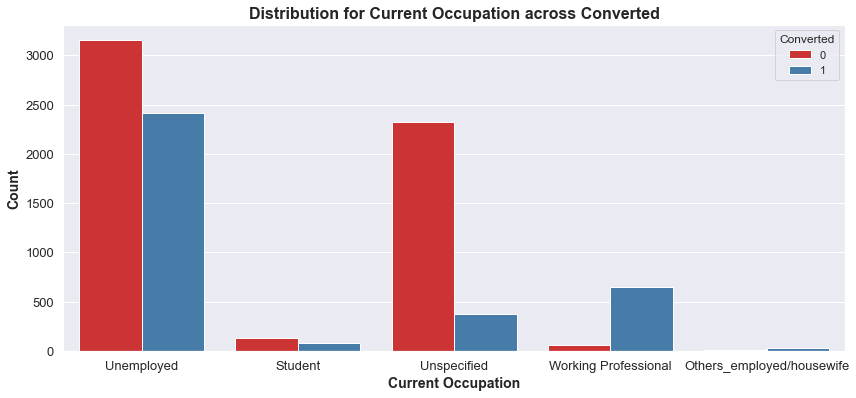

In [77]:
plt.figure(figsize=(14,6))
cur_occ_plt=sns.countplot(lead_df1['What is your current occupation'], hue=lead_df1.Converted,orient='h',palette="Set1")

plt.title("Distribution for Current Occupation across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Current Occupation", fontsize = 14, fontweight ='bold' )

plt.show()

#### Inferences 
- Ideally categorical columns are imputed with mode but in the given case approx. 30% values are missing and if I replace with mode it will make the column highly skewed so rather than that I’ll impute them with new category `Unspecified` 
- Secondly the categories `Other`, `Housewife`, `Businessman` have very less percentage so its better to capping them into one  called `Others_employed/housewife` 
- Unemployed Leads make the most out of all in terms of count.
- There are elevated chances of Working Professionals joining the course.

In [78]:
lead_df1['Tags'].value_counts(dropna = False)

NaN                                                  3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [79]:
100*lead_df1['Tags'].value_counts(dropna=False,normalize=True)

NaN                                                  36.310300
Will revert after reading the email                  22.294654
Ringing                                              13.037810
Interested in other courses                           5.573664
Already a student                                     5.052151
Closed by Horizzon                                    3.889613
switched off                                          2.607562
Busy                                                  2.020860
Lost to EINS                                          1.890482
Not doing further education                           1.575402
Interested  in full time MBA                          1.271186
Graduation in progress                                1.205997
invalid number                                        0.901782
Diploma holder (Not Eligible)                         0.684485
wrong number given                                    0.510648
opp hangup                                            0

In [80]:
# imputing na values with 'Not Mentioned'
lead_df1['Tags'] = lead_df1['Tags'].fillna('Unspecified')

In [81]:
100*lead_df1['Tags'].value_counts(dropna=False,normalize=True)

Unspecified                                          36.310300
Will revert after reading the email                  22.294654
Ringing                                              13.037810
Interested in other courses                           5.573664
Already a student                                     5.052151
Closed by Horizzon                                    3.889613
switched off                                          2.607562
Busy                                                  2.020860
Lost to EINS                                          1.890482
Not doing further education                           1.575402
Interested  in full time MBA                          1.271186
Graduation in progress                                1.205997
invalid number                                        0.901782
Diploma holder (Not Eligible)                         0.684485
wrong number given                                    0.510648
opp hangup                                            0

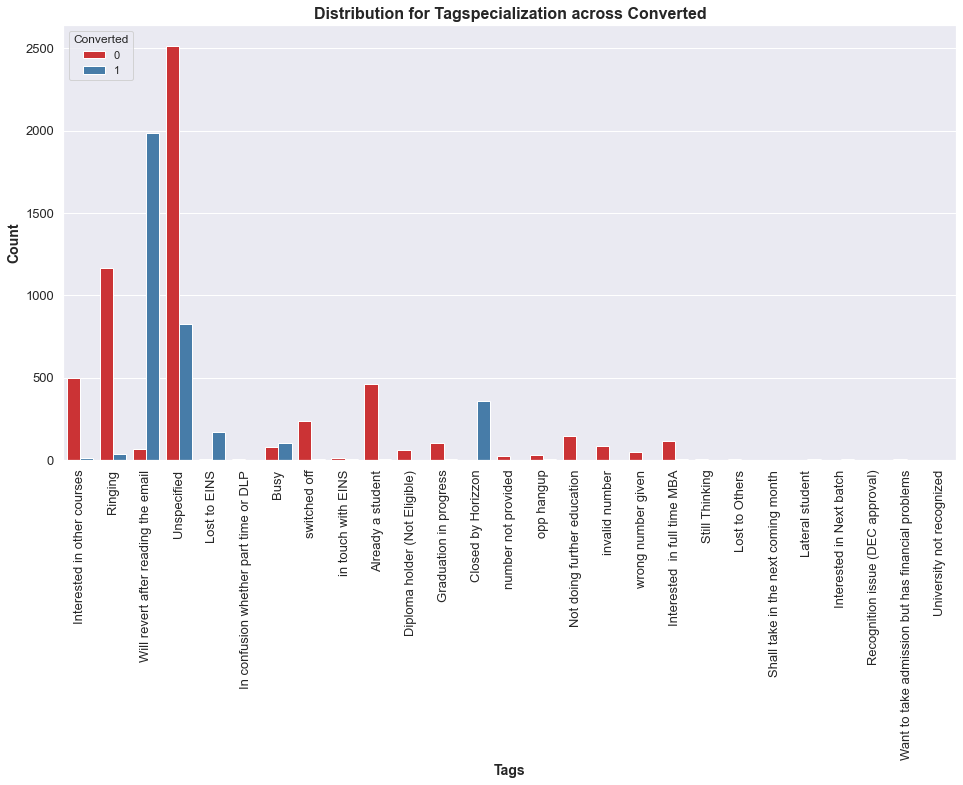

In [82]:
plt.figure(figsize=(16,8))
tags_plt=sns.countplot(lead_df1['Tags'], hue=lead_df1.Converted,orient='h',palette='Set1')

plt.title("Distribution for Tagspecialization across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Tags", fontsize = 14, fontweight ='bold' )

plt.show()

#### Inferences 
- Imputing nan values with mode will be skew our data at same time majority of values are missing about 36% so imputing them with new category `Not Mentioned` 


In [83]:
# Checking city column
100*lead_df1['City'].value_counts(dropna = False, normalize= True)

NaN                            39.526293
Mumbai                         34.984789
Thane & Outskirts               8.159496
Other Cities                    7.453281
Other Cities of Maharashtra     4.954368
Other Metro Cities              4.117775
Tier II Cities                  0.803998
Name: City, dtype: float64

In [84]:
lead_df1['City']= lead_df1['City'].fillna("Pan")

In [85]:
# Checking city column
100*lead_df1['City'].value_counts(dropna = False, normalize= True)

Pan                            39.526293
Mumbai                         34.984789
Thane & Outskirts               8.159496
Other Cities                    7.453281
Other Cities of Maharashtra     4.954368
Other Metro Cities              4.117775
Tier II Cities                  0.803998
Name: City, dtype: float64

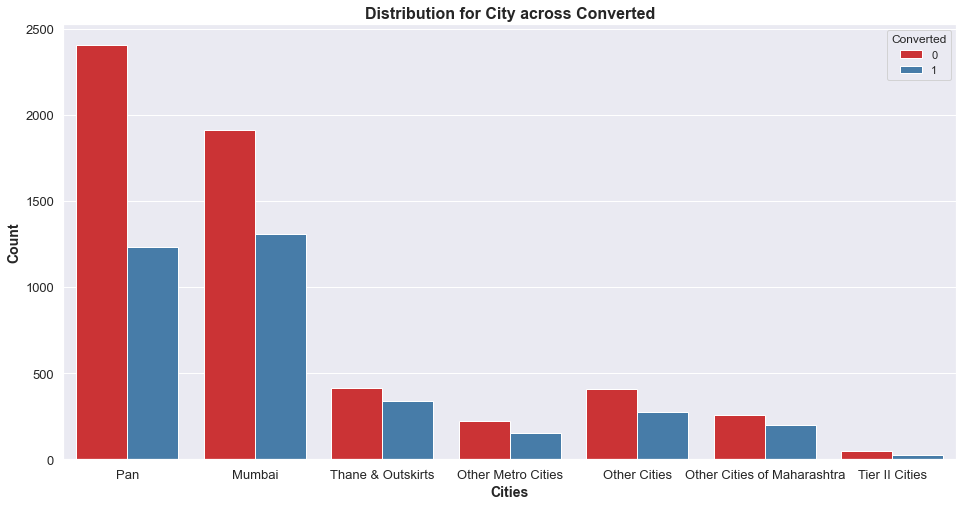

In [86]:
plt.figure(figsize=(16,8))
city_plt=sns.countplot(lead_df1.City, hue=lead_df1.Converted,orient='h',palette="Set1")
plt.title("Distribution for City across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Cities", fontsize = 14, fontweight ='bold' )
plt.show()

#### Inferences
- Imputing missing values with `Pan` as  mode will skew data at same time majority values are missing  


In [87]:
# Checking nan values
# All missing have been treated 
100*lead_df1.isnull().mean()

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [88]:
# Checking shape
lead_df1.shape

(9204, 14)

In [89]:
# Checking last notable activities 
lead_df1['Last Notable Activity'].value_counts(dropna=False)

Modified                        3397
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [90]:
#Combining low count values into one variable "Others"
lead_df1['Last Notable Activity'] = lead_df1['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                   'Unreachable','Unsubscribed','Email Bounced',
                                                                   'Resubscribed to emails','View in browser link Clicked',
                                                                   'Approached upfront','Form Submitted on Website', 
                                                                   'Email Received'],'Others')

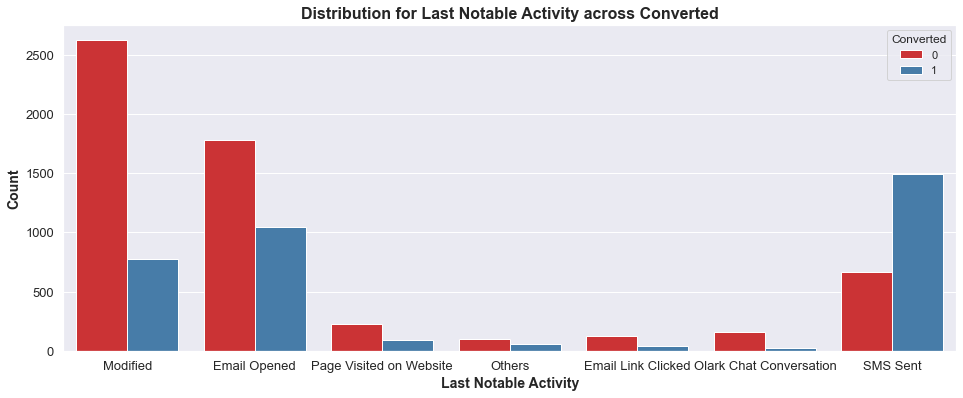

In [91]:
plt.figure(figsize = (16,6))
lna1=sns.countplot(x = lead_df1['Last Notable Activity'], hue = lead_df1['Converted'], palette='Set1')
plt.title("Distribution for Last Notable Activity across Converted",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("Last Notable Activity", fontsize = 14, fontweight ='bold' )
plt.show()

In [92]:
lead_df1['A free copy of Mastering The Interview'].value_counts(dropna=False,normalize= True)

No     0.686223
Yes    0.313777
Name: A free copy of Mastering The Interview, dtype: float64

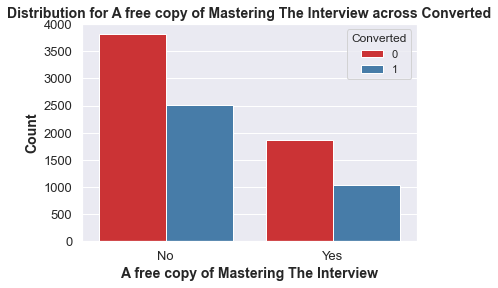

In [93]:
master=sns.countplot(x = lead_df1['A free copy of Mastering The Interview'], hue = lead_df1['Converted'], palette='Set1')
plt.title("Distribution for A free copy of Mastering The Interview across Converted",fontweight='bold', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.ylabel("Count", fontsize = 14, fontweight ='bold' )
plt.xlabel("A free copy of Mastering The Interview", fontsize = 14, fontweight ='bold' )
plt.show()

#### Inferences
- Since A free copy of Mastering The Interview is not very skewed we can skip dropping
- Its binary in nature so converting in to numerical using a function

In [94]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the A free copy of Mastering The Interview
lead_df1['A free copy of Mastering The Interview'] = lead_df1[['A free copy of Mastering The Interview']].apply(binary_map)

In [95]:
lead_df1.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Pan,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Pan,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


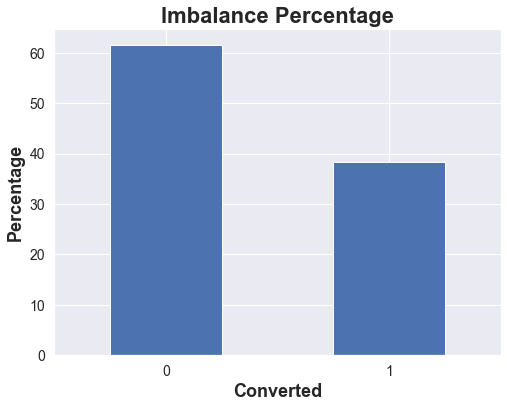

In [96]:
# Plotting a bar plot to check data imbalance for target variable
plt.figure(figsize=[8,6])

(lead_df1['Converted'].value_counts(normalize=True)*100).plot(kind='bar')

plt.xlabel('Converted',fontweight='bold', fontsize=18)
plt.ylabel('Percentage',fontweight='bold', fontsize=18)
plt.xticks(fontsize=14, rotation= '0')
plt.yticks( fontsize=14)

plt.title('Imbalance Percentage',fontweight='bold', fontsize=22)
plt.show()

In [97]:
(lead_df1['Converted'].value_counts(normalize=True)*100)

0    61.62538
1    38.37462
Name: Converted, dtype: float64

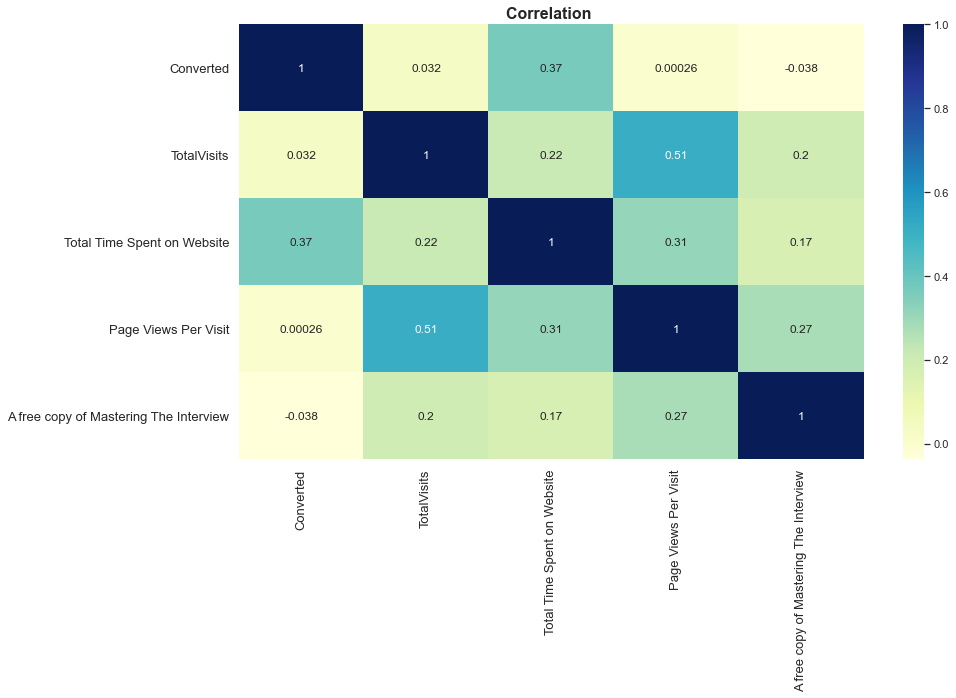

In [98]:
#check correlation of numeric variables
plt.figure(figsize=(14,8))
sns.heatmap(lead_df1.corr(), annot=True,cmap="YlGnBu")
plt.title("Correlation ",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)


plt.show()

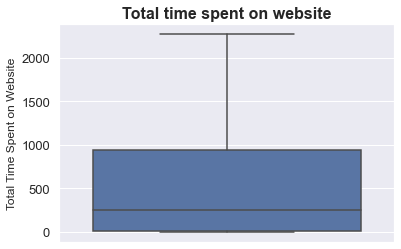

In [99]:
#Check for outliers in Total Time spent on Website
sns.boxplot(y=lead_df1['Total Time Spent on Website'])
plt.title("Total time spent on website",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()

#### Inferences
- Since we dont see any outiers. Hence the column isnt in need of outlier treatment

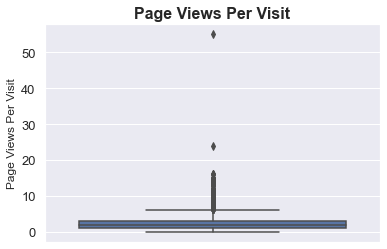

In [100]:
#Check for outliers in Page Views Per Visit
sns.boxplot(y=lead_df1['Page Views Per Visit'])
plt.title("Page Views Per Visit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()

#### Inferences
- There is a possibility of outliers may need to treated

In [101]:
#check for percentiles
lead_df1['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9204.000000
mean        2.370151
std         2.145554
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

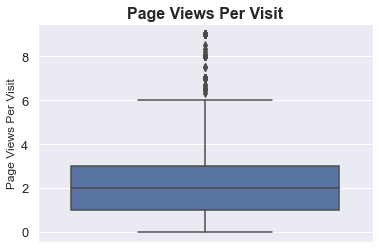

In [102]:
#outlier treatment by capping
q1 = lead_df1['Page Views Per Visit'].quantile(0.99)
lead_df1 = lead_df1[lead_df1['Page Views Per Visit'] <= q1]

q2 = lead_df1['Page Views Per Visit'].quantile(0.01)
lead_df1 = lead_df1[lead_df1['Page Views Per Visit'] >= q2]

sns.boxplot(y=lead_df1['Page Views Per Visit'])
plt.title("Page Views Per Visit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()


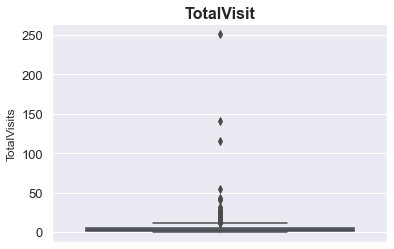

In [103]:
#Checking for presence of outliers in Total Visits
sns.boxplot(y=lead_df1['TotalVisits'])
plt.title("TotalVisit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()


In [104]:
#Check for percentiles
lead_df1['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9129.000000
mean        3.360938
std         4.665964
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        16.000000
max       251.000000
Name: TotalVisits, dtype: float64

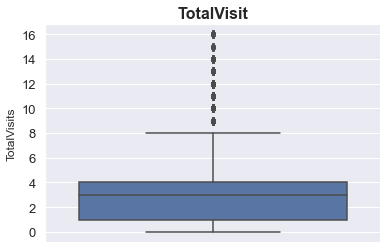

In [105]:
#outlier treatement by capping
q1 = lead_df1.TotalVisits.quantile(0.99)
lead_df1 = lead_df1[(lead_df1.TotalVisits <= q1)]

q2 = lead_df1.TotalVisits.quantile(0.01)
lead_df1 = lead_df1[(lead_df1.TotalVisits >= q2)]

sns.boxplot(y=lead_df1['TotalVisits'])
plt.title("TotalVisit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()

### Now checking for spread of each of them across target variable


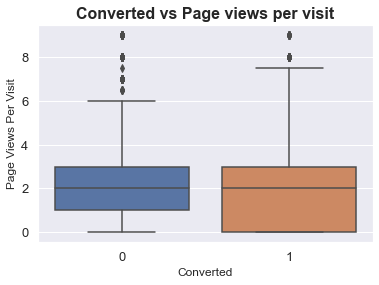

In [106]:
sns.boxplot(x=lead_df1.Converted,y=lead_df1['Page Views Per Visit'])
plt.title("Converted vs Page views per visit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()

#### Inferences
- Both converted and not converted have approximately same median for Page Views Per Visi

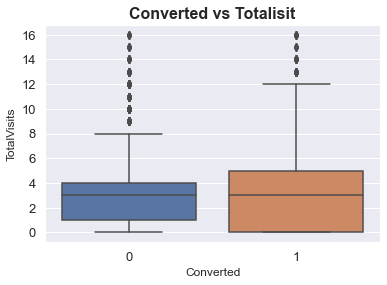

In [107]:
sns.boxplot(x=lead_df1.Converted,y=lead_df1['TotalVisits'])
plt.title("Converted vs Totalisit",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()

#### Inferences
-- Both converted and not converted have approximately same median for TotalVisits

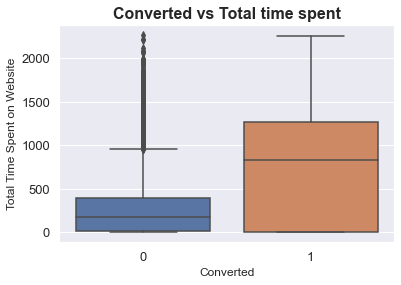

In [108]:
sns.boxplot(x=lead_df1.Converted,y=lead_df1['Total Time Spent on Website'])
plt.title("Converted vs Total time spent",fontweight='bold', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize = 13)
plt.show()


#### Inferences
- Leads that spend more time on website are more likely to be converted.

In [109]:
# Rechecking missing values 
round(100*lead_df1.isnull().mean(),2)


Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [110]:
lead_df1['A free copy of Mastering The Interview'].value_counts()

0    6250
1    2788
Name: A free copy of Mastering The Interview, dtype: int64

In [111]:
lead_df1.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Pan,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Pan,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


## Creating dummy variables 

In [112]:
# creating a copy
df = lead_df1.copy()

In [113]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 
                           'Specialization','What is your current occupation',
                        'City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Pan,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [114]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Pan,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Pan,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Pan,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [115]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 
              'Specialization','What is your current occupation',
              'Tags','City','Last Notable Activity'], axis = 1)

In [116]:
df=df.drop(['Prospect ID'],1)

In [117]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Pan,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [118]:
df.shape

(9038, 51)

## Splitting the data into train and test set

In [119]:
from sklearn.model_selection import train_test_split

y = df['Converted']
X=df.drop('Converted', axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6326 entries, 4967 to 5763
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6326 non-null   float64
 1   Total Time Spent on Website                           6326 non-null   int64  
 2   Page Views Per Visit                                  6326 non-null   float64
 3   A free copy of Mastering The Interview                6326 non-null   int64  
 4   Lead Origin_Landing Page Submission                   6326 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6326 non-null   uint8  
 6   Lead Origin_Lead Import                               6326 non-null   uint8  
 7   Lead Source_Google                                    6326 non-null   uint8  
 8   Lead Source_Live Chat                                 6

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [123]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Pan,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4967,-0.403458,-0.480647,-0.144278,-0.662845,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
7449,-0.754239,-0.158957,-0.677933,1.508649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
8280,-0.403458,0.028543,-0.144278,-0.662845,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8911,-1.105019,-0.886897,-1.211587,-0.662845,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
8183,-1.105019,-0.886897,-1.211587,-0.662845,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Model building

In [124]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Train Set

In [125]:
lr = LogisticRegression()
rfe = RFE(lr, 15)             
rfe = rfe.fit(X_train, y_train)

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Live Chat', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 36),
 ('Specialization_Healthcare Management', False, 22),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management'

In [127]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management', 'Specialization_Unspecified',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Unspecified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [128]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current 

### Model 1

In [129]:
#Model1

X_train_sm = sm.add_constant(X_train[col])
l1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = l1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           -1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.7
Date:                Mon, 26 Oct 2020   Deviance:                       5213.3
Time:                        23:10:03   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5921      0.235     -2.516      0.012      -1.053      -0.131
Total Time Spent on Website                              1.0938      0.040     27.157      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -0.9880      0.128     -7.712      0.000      -1.239      -0.737
Lead Origin_Lead Add Form                                1.4424      0.909      1.587      0.112      -0.339       3.223
Lead Source_Olark Chat                                   0.9018      0.120      7.511      0.000       0.666       1.137
Lead Source_Reference                                    1.4773      0.923      1.600      0.110      -0.333       3.287
Lead Source_Welingak Website                             4.0862      1.159      3.527      0.000       1.815       6.357
Specialization_Hospitality Management                   -0.6586      0.332     -1.983      0.047      -1.309      -0.008
Specialization_Retail Management                        -0.8213      0.358     -2.292      0.022      -1.523      -0.119
Specialization_Unspecified                              -0.9124      0.123     -7.406      0.000      -1.154      -0.671
What is your current occupation_Unemployed              -0.1509      0.202     -0.746      0.455      -0.547       0.245
What is your current occupation_Unspecified             -1.1781      0.212     -5.553      0.000      -1.594      -0.762
What is your current occupation_Working Professional     2.2325      0.271      8.231      0.000       1.701       2.764
Last Notable Activity_Email Opened                       0.7625      0.083      9.141      0.000       0.599       0.926
Last Notable Activity_Others                             0.9292      0.241      3.854      0.000       0.457       1.402
Last Notable Activity_SMS Sent                           2.0004      0.091     22.013      0.000       1.822       2.179
========================================================================================================================
"""

### Inferences
- High p value suggest statistically insignificant so better to drop those feature 
- As`What is your current occupation_Unemployed	` has high p value than threshold therefore dropping it

### Model 2

In [130]:
col = col.drop('What is your current occupation_Unemployed',1)

In [131]:
#Model2
X_train_sm = sm.add_constant(X_train[col])
l2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = l2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.9
Date:                Mon, 26 Oct 2020   Deviance:                       5213.9
Time:                        23:10:03   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7380      0.131     -5.643      0.000      -0.994      -0.482
Total Time Spent on Website                              1.0944      0.040     27.170      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -0.9860      0.128     -7.697      0.000      -1.237      -0.735
Lead Origin_Lead Add Form                                1.4378      0.909      1.582      0.114      -0.343       3.219
Lead Source_Olark Chat                                   0.9060      0.120      7.554      0.000       0.671       1.141
Lead Source_Reference                                    1.4884      0.923      1.612      0.107      -0.321       3.298
Lead Source_Welingak Website                             4.0869      1.159      3.527      0.000       1.816       6.358
Specialization_Hospitality Management                   -0.6573      0.332     -1.979      0.048      -1.308      -0.006
Specialization_Retail Management                        -0.8237      0.358     -2.298      0.022      -1.526      -0.121
Specialization_Unspecified                              -0.9118      0.123     -7.399      0.000      -1.153      -0.670
What is your current occupation_Unspecified             -1.0338      0.088    -11.776      0.000      -1.206      -0.862
What is your current occupation_Working Professional     2.3771      0.190     12.518      0.000       2.005       2.749
Last Notable Activity_Email Opened                       0.7627      0.083      9.144      0.000       0.599       0.926
Last Notable Activity_Others                             0.9285      0.241      3.851      0.000       0.456       1.401
Last Notable Activity_SMS Sent                           1.9965      0.091     22.011      0.000       1.819       2.174
========================================================================================================================
"""

### Inferences
- Again dropping feature for high pvalue s they are not statistically significamnt so `Lead Origin_Lead Add Form` has high p value than threshold therefore dropping it

In [132]:
col = col.drop('Lead Origin_Lead Add Form',1)

### Model 3

In [133]:
#Model3
X_train_sm = sm.add_constant(X_train[col])
l3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = l3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6326
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.3
Date:                Mon, 26 Oct 2020   Deviance:                       5216.6
Time:                        23:10:04   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7151      0.130     -5.499      0.000      -0.970      -0.460
Total Time Spent on Website                              1.0919      0.040     27.142      0.000       1.013       1.171
Lead Origin_Landing Page Submission                     -1.0074      0.128     -7.898      0.000      -1.257      -0.757
Lead Source_Olark Chat                                   0.8972      0.120      7.493      0.000       0.663       1.132
Lead Source_Reference                                    2.9091      0.214     13.609      0.000       2.490       3.328
Lead Source_Welingak Website                             5.5155      0.726      7.596      0.000       4.092       6.939
Specialization_Hospitality Management                   -0.6587      0.332     -1.983      0.047      -1.310      -0.008
Specialization_Retail Management                        -0.8246      0.358     -2.302      0.021      -1.527      -0.122
Specialization_Unspecified                              -0.9284      0.123     -7.555      0.000      -1.169      -0.688
What is your current occupation_Unspecified             -1.0355      0.088    -11.800      0.000      -1.208      -0.864
What is your current occupation_Working Professional     2.3724      0.190     12.490      0.000       2.000       2.745
Last Notable Activity_Email Opened                       0.7639      0.083      9.163      0.000       0.600       0.927
Last Notable Activity_Others                             0.9257      0.241      3.841      0.000       0.453       1.398
Last Notable Activity_SMS Sent                           1.9963      0.091     22.013      0.000       1.819       2.174
========================================================================================================================
"""

### Inferences
- For all features p-vales seems statistically significant so check VIF(Variance inflation factor) for Multicollinearity 

### Lets check VIF

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,Specialization_Unspecified,2.25
1,Lead Origin_Landing Page Submission,2.04
2,Lead Source_Olark Chat,1.91
3,What is your current occupation_Unspecified,1.62
4,Last Notable Activity_Email Opened,1.59
5,Last Notable Activity_SMS Sent,1.55
6,Total Time Spent on Website,1.25
7,Lead Source_Reference,1.21
8,What is your current occupation_Working Profes...,1.20
9,Lead Source_Welingak Website,1.10


### Inferences for variance inflation factor (VIF)
- Since all the values are below ideal threshold of 5. We do not drop any feature

In [135]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4967    0.756286
7449    0.616858
8280    0.299754
8911    0.060070
8183    0.908332
7637    0.481388
5507    0.147234
5789    0.097869
4725    0.238366
7941    0.954634
dtype: float64

In [136]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7562859 , 0.616858  , 0.2997541 , 0.06006992, 0.90833158,
       0.4813877 , 0.14723436, 0.09786949, 0.23836636, 0.95463369])

In [137]:
# Creating a new dataframe with the actual churn flag and the predicted probabilities of them respectively
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.756286,4967
1,1,0.616858,7449
2,0,0.299754,8280
3,1,0.060070,8911
4,0,0.908332,8183


## Selecting optimal threshold and model evaluation

In [138]:
from sklearn import metrics

In [139]:
#ROC curve code snippet from external source(Module notes)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

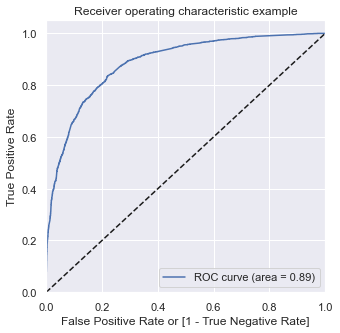

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Inferences for ROC and AOC
- ROC Curve value of 0.89 is quiet close to 1, hence indicating a good predictive model.

In [142]:
# In the obove section we chose an arbitary cut-off value of 0.5.Hence, we are supposed to find the best cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.756286,4967,1,1,1,1,1,1,1,1,0,0
1,1,0.616858,7449,1,1,1,1,1,1,1,0,0,0
2,0,0.299754,8280,1,1,1,0,0,0,0,0,0,0
3,1,0.060070,8911,1,0,0,0,0,0,0,0,0,0
4,0,0.908332,8183,1,1,1,1,1,1,1,1,1,1


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

from sklearn.metrics import confusion_matrix

var = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in var:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.383497     1.000000     0.000000
0.1          0.1  0.623143     0.969909     0.407436
0.2          0.2  0.759248     0.908904     0.666154
0.3          0.3  0.796080     0.843776     0.766410
0.4          0.4  0.809042     0.774526     0.830513
0.5          0.5  0.812046     0.694971     0.884872
0.6          0.6  0.797344     0.591921     0.925128
0.7          0.7  0.782959     0.517725     0.947949
0.8          0.8  0.758299     0.416735     0.970769
0.9          0.9  0.718780     0.289365     0.985897


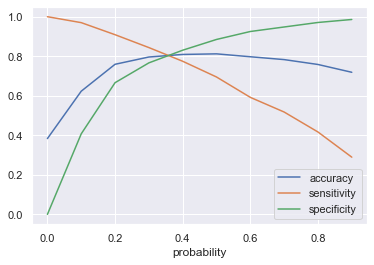

In [144]:
# Let's plot curves for accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### Inferences and cut off probability
- 0.35 seems to be an optimal point to take as cutoff probability

In [145]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.756286,4967,1,1,1,1,1,1,1,1,0,0,1
1,1,0.616858,7449,1,1,1,1,1,1,1,0,0,0,1
2,0,0.299754,8280,1,1,1,0,0,0,0,0,0,0,0
3,1,0.060070,8911,1,0,0,0,0,0,0,0,0,0,0
4,0,0.908332,8183,1,1,1,1,1,1,1,1,1,1,1


In [146]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100,2))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head(20)

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.756286,4967,1,75.63
1,1,0.616858,7449,1,61.69
2,0,0.299754,8280,0,29.98
3,1,0.060070,8911,0,6.01
4,0,0.908332,8183,1,90.83
5,0,0.481388,7637,1,48.14
6,0,0.147234,5507,0,14.72
7,0,0.097869,5789,0,9.79
8,0,0.238366,4725,0,23.84
9,1,0.954634,7941,1,95.46


In [147]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8019285488460323

In [148]:
conf_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
conf_mat2

array([[3117,  783],
       [ 470, 1956]], dtype=int64)

In [149]:
TP = conf_mat2[1,1] # true positive 
TN = conf_mat2[0,0] # true negatives
FP = conf_mat2[0,1] # false positives
FN = conf_mat2[1,0] # false negatives

In [150]:
# Sensitivity
TP / float(TP+FN)

0.8062654575432812

In [151]:
# Specificity
TN / float(TN+FP)

0.7992307692307692

In [152]:
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
conf

array([[3117,  783],
       [ 470, 1956]], dtype=int64)

In [153]:
#Precision
conf[1,1]/(conf[0,1]+conf[1,1])

0.7141292442497261

In [154]:
#Recall
conf[1,1]/(conf[1,0]+conf[1,1])

0.8062654575432812

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7141292442497261

In [157]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8062654575432812

## Test Set

In [158]:
#scaling test set
cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Pan,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5128,-0.403458,-0.473294,-0.144278,-0.662845,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3771,1.350443,-0.877705,2.523994,1.508649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3560,-0.403458,-0.396089,-0.677933,-0.662845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6431,0.648882,-0.186530,1.456685,1.508649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
557,-1.105019,-0.886897,-1.211587,-0.662845,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [159]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Retail Management,Specialization_Unspecified,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Others,Last Notable Activity_SMS Sent
5128,-0.473294,1,0,0,0,0,0,0,0,0,0,0,1
3771,-0.877705,1,0,0,0,0,0,0,0,0,1,0,0
3560,-0.396089,0,0,0,0,0,0,1,1,0,0,0,0
6431,-0.186530,1,0,0,0,0,0,0,0,0,0,0,1
557,-0.886897,0,1,0,0,0,0,1,1,0,0,0,0


In [160]:
X_test_sm = sm.add_constant(X_test)

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

5128    0.439526
3771    0.128193
3560    0.042632
6431    0.517501
557     0.060070
4100    0.041023
4917    0.060070
1819    0.731328
6484    0.536024
2173    0.347603
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred1 = pd.DataFrame(y_test_pred)

In [164]:
y_pred1.head()

,0
5128,0.439526
3771,0.128193
3560,0.042632
6431,0.517501
557,0.060070


In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [167]:
# Removing index for both dataframes
y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred1
y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)

In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5128,0.439526
1,0,3771,0.128193
2,0,3560,0.042632
3,0,6431,0.517501
4,0,557,0.060070


In [170]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100,2))

In [171]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5128,0,0.439526,43.95
1,3771,0,0.128193,12.82
2,3560,0,0.042632,4.26
3,6431,0,0.517501,51.75
4,557,0,0.060070,6.01


In [172]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [173]:
#Accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8042035398230089

In [174]:
conf_mat3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
conf_mat3

array([[1327,  347],
       [ 184,  854]], dtype=int64)

In [175]:
TP = conf_mat3[1,1] # true positive 
TN = conf_mat3[0,0] # true negatives
FP = conf_mat3[0,1] # false positives
FN = conf_mat3[1,0] # false negatives

In [176]:
# Sensitivity
TP / float(TP+FN)

0.8227360308285164

In [177]:
#Specificity
TN / float(TN+FP)

0.7927120669056152

In [178]:
conf2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
conf2

array([[1327,  347],
       [ 184,  854]], dtype=int64)

In [179]:
#precision
conf2[1,1]/(conf2[0,1]+conf2[1,1])

0.7110741049125728

In [180]:
#Recall
(conf2[1,1])/float(conf2[1,0]+conf2[1,1])

0.8227360308285164

In [181]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7110741049125728

In [182]:
recall_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8227360308285164

### Observations:

<b>Train Set Observations:</b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Test Set Observations:</b>

- Accuracy    -        80.19%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Accuracy    -        80.40%
- Sensitivity/Recall - 80.62%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;- Sensitivity/Recall - 82.27%
- Specificity -        80.00%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;- Specificity -        79.27%
- Precision -          71.41%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;- Precision -          71.10%